<h1>Regresión Logística para la predicción de divorcios</h1>

En este Notebook vamos a hacer una regresión logístia por medio de una sola neurona, o perceptró. El proceso va a ser llevado desde un inicio con el mayor nivel de explicación que me sea posible dar.

El ejercicio está basado en el Notebook de Andrew Ng llamado Logistic Regression with a Neural Network, aunque el ejercicio está excelentemente explicado quiero replicarlo, esto lo voy a hacer en mis propias palabras es por eso que lo estoy haciendo en español.

Llamamos nuestras librerias a ocupar.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from collections import Counter

Cargamos el conjunto de datos necesarios para la realización de la regresión losgística.

En este caso el conjunto de datos está tomado del siguiente link:
[Conjunto de datos sobre cuestionario de divorcios](https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set)

Para mayor información sobre el conjunto de datos checar la publicación.

*Yöntem, M , Adem, K , İlhan, T , Kılıçarslan, S. (2019). DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS. Nevşehir Hacı Bektaş Veli University SBE Dergisi, 9 (1), 259-273.* [Publicación](https://dergipark.org.tr/tr/pub/nevsosbilen/issue/46568/549416)  

In [81]:
df = pd.read_csv("/content/sample_data/divorce.csv", sep = '\t', header=None)

Ya una vez cargados los datos en un DataFrame de pandas, vamos a ver la distribución de las dos clases (divorciados|casados) para validar que no estéé desbalanceado el conjunto de datos.

In [82]:
print(Counter(df.iloc[:, -1]))

Counter({0: 86, 1: 84})


Se puede observar que tiene la cantidad de datos de las siguientes clases:

| Divorciados  | Casados     |
|:------------:|:-----------:|
|86            |84           |

Por lo tanto se puede observar que efectivamente estamos ante un conjunto de datos balanceado.

Al momento de dividir el conjunto de datos en el conjunto de entrenamiento *(train)* y el conjunto de prueba *(test)* debemos asegurarnos de que ese balanceo sea consistente así que vamos a separar el conjunto de datos en divorciados y casados.

In [83]:
# dataframe de divorciados
df_div = df[df[54] == 1]
# dataframe de los casados
df_cas = df[df[54] == 0]

Solo vamos a crear temporalmente las variables *target* que en este caso contienen al atributo clase. Son temporales porque train_test_split lo requiere.

In [84]:
target_div = df_div.iloc[:, -1]
target_cas = df_cas.iloc[:, -1]

Validamos que las dimensiones sigan estando correctas.


In [85]:
print(df_div.shape)
print(df_cas.shape)


(84, 55)
(86, 55)


Ahora si pasamos a dividir en conjunto de entranamiento y conjunto de prueba a los dos *DataFrame* que teniamos, cabe recordar que los conjuntos, *y_train* y *y_test* son temporales y los creamos para poder ejecutar *train_test_split*

In [86]:
X_train_div, X_test_div, y_train_div, y_test_div = train_test_split(df_div, target_div, train_size=0.8)
X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(df_cas, target_cas, train_size=0.8)

Validamos que los conjuntos de entrenamiento y prueba tengan las dimensiones correctas.

In [87]:
print(X_train_div.shape)
print(X_test_div.shape)
print()
print(X_train_cas.shape)
print(X_test_cas.shape)


(67, 55)
(17, 55)

(68, 55)
(18, 55)


Efectivamente, están conrrectas ya que el 20 % de 84 es aproximadamente 17 (16.8) y el correspondiente 20 % de los casados que son 86 es cerca de 18 (17.2).

Todo sumado son 170 datos, los cuales son con los que iniciamos.

Ahora, concatenamos los conjuntos de entrenamiento (divorciados y casados) y los de prueba, así no quedará un solo solo conjunto de datos para cada uno de ellos.

In [88]:
X_train = pd.concat((X_train_div, X_train_cas), axis=0)
X_test =  pd.concat((X_test_div , X_test_cas), axis=0)
y_train = pd.concat((y_train_div, y_train_cas), axis=0)
y_test =  pd.concat((y_test_div,  y_test_cas), axis=0)

Validamos que las dimensiones sigan correctas

In [89]:
print(X_train.shape)
print(X_test.shape)

(135, 55)
(35, 55)


Ahora, vamos a intercambiar filas de los dos conjuntos de datos de una manera aleatoria, ya que en el último paso de concatenación dejamos a los divorciados todos juntos y a los casados todos juntos, esto se hace para evitar que el perceptrón no detecte el patrón de las clases en lugar de depenter puramente de sus entradas

In [90]:
X_train = X_train.sample(frac=1.0, random_state=1)
X_test = X_test.sample(frac=1.0, random_state=1)

Lo que vamos a hacer ahora es crear los verdaderos *y_train* y *y_test* que son la variables que contienen sus respectivas clases a las que perteneces dichos datos.

De igual manera le quitamos el conjunto de clases a los conjuntos de datos de entrenamiento y prueba.

In [91]:
y_train = X_train.iloc[:, -1]
y_test = X_test.iloc[:, -1]
X_train = X_train.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

Validamos que los índices de las clases pertenezcan a sus respectivos conjuntos de datos. 

In [92]:
print(X_train.index)
print(y_train.index)
print(X_test.index)
print(y_test.index)

Int64Index([ 12,   0, 109,  62,  75, 119,   1,  83,  61, 165,
            ...
             79, 144,  93,   6,  59, 162, 148,  97, 106,  42],
           dtype='int64', length=135)
Int64Index([ 12,   0, 109,  62,  75, 119,   1,  83,  61, 165,
            ...
             79, 144,  93,   6,  59, 162, 148,  97, 106,  42],
           dtype='int64', length=135)
Int64Index([ 29, 139,  49, 102, 125, 169, 111, 155, 134, 152, 108,  88,   7,
              8, 116, 120,  30, 157,  87, 113, 145, 131,  43,   9,  44, 161,
             22,  47,  38,  78,   2,   5,  32,  28,  80],
           dtype='int64')
Int64Index([ 29, 139,  49, 102, 125, 169, 111, 155, 134, 152, 108,  88,   7,
              8, 116, 120,  30, 157,  87, 113, 145, 131,  43,   9,  44, 161,
             22,  47,  38,  78,   2,   5,  32,  28,  80],
           dtype='int64')


Ahora validamos que las dimensiones finales estén correctas.

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(135, 54)
(135,)
(35, 54)
(35,)


Ahora terminamos con un conjunto de entremiento con 135 datos y 54 atributos, con su respectiva lista de clases supervisadas a las que perteneces esos datos; también tenemos 35 datos de prueba con sus mismos 54 atributos y su varible de clases.

|conjunto de datos|dimensiones|
|---|:-:|
|X_train|(135,54)|
|y_train|(135, )|
|X_test|(35,54)|
|y_test|(35, )|


Ahora, apartir de aquí vamos a empezar a trabajar en *numpy* ya que vamos a centrarnos en hacer operaciones más que tratamiento de datos. Oficialmente terminó nuestra etapa de preparación de datos y análisis exploratorio de datos.

Comenzamos con el modelado.

Vamos a sacar el objeto *numpy* de *pandas*. También vamos a preparar los datos de ambos conjuntos de X, esto ya que cada dato debe estar en una columna y cada atributo debe de estar en cada fila, esto es necesario para poder aplicar la vectorización en *numpy* y poder aplicar la ecuación lineal vectorizada de una menera óptima.

La ecuación de la recta vectorizada es la siguiente:

$$z = W^{T}X + b$$

Cabe mencionar que en este ejemplo el vector de los pesos originalmente es un vector columna con dimensiones (número atributos, 1) por lo cual al tenerlo en su traspuesta nos queda en dimensiones (1, número atributos), esto permite una multiplicación matricial con X ya que sus dimensiones son correctas, es decir

dim(W.T) = (1, número atributos)

dim(X) = (número atributos, m)

Donde número de atributos es 54 y m = 135 para el conjunto de entrenamiento.

b en este caso es un escalar ya que solo tenemos un perceptrón.

In [94]:
# Sacamos el numpy de cada dataframe y lo guardamos con su 
# traspuesta para acomodarlo en el convenio
X_train = X_train.values
X_train = X_train.T

X_test = X_test.values
X_test = X_test.T

In [95]:
# Normalizamos el conjunto X de entrenamiento y de test
# como el valor máximo que podemos tener es 4 solo vamos a dividir entre en máximo
X_train = X_train / 4
X_test = X_test / 4


Validamos que las dimensiones sean las mencionadas anteriormente.

In [96]:
# Como podemos ver el valor de m en nuestro ejemplo es 135
# y el tamaño del conjunto de prueba es de 35
print(X_train.shape)
print(X_test.shape)

(54, 135)
(54, 35)


Ahora vamos a preparar los conjuntos y ya que estas deben de estar en un vector fila y actualmente están en un conjunto columna.

OJO, En este punto son adimensionales, lo cual nos puede crear problemas al momento de hacer cálculos con ellas, por lo tanto primero es ponerlas en el plano dimensional.

In [97]:
y_train = y_train.values
y_test = y_test.values
print(y_train.shape)
print(y_test.shape)


(135,)
(35,)


In [98]:
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [99]:
print(y_train.shape)
print(y_test.shape)

(1, 135)
(1, 35)


Ahora sí, pasamos a crear las funciones correspondientes para poder ejecutar una regreción logística con una neurona por medio de *backpropagation*.

Como la activación de dicha neurona va a ser con una función sigmoide, la declaramos.

OJO, las funciones están en inglés ya que son copiadas directamente de mi propio ejercicio hecho en el notebook de Andrew Ng.

In [100]:
# Función de activación
def sigmoid(z):
    """
    Computa el sigmoide de z

    Argumentos:
    z -- Un escalar o un array de numpy de cualquier tamaño.

    Returna:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

Nuestros pesos en un principio van a estar inicializados en ceros junto con nuestro sesgo, no es la mejor inicialización y menos con una activacióón sigmoidal ya que da oportunidad a la saturación de neuronas. Así va el ejercicio y en proyectos posteriores vamos a crear más activaciones, en este caso no hay mayor problema ya que es solo una neurona.

In [101]:
# Función de inicialización de pesos en ceros
def initialize_with_zeros(dim):
    """
    Esta función crea un vector de ceros con dimensiones (dim, 1) para w e inicializa b a cero
    
    Argument:
    dim -- tamaño de el vector w que queremos (o el número de parámetros en este caso)
    size of the w vector we want (or number of parameters in this case)
    
    Returna:
    w -- el vector inicializado de dimensiones (dim, 1)
    b -- el escalar inicializado de dimensiones (dim, 1)
    """
    w = np.zeros(shape=(dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

## Propagación hacia adelante.
Ahora, vamos a crear la propagación hacia adelante de cada uno de los datos, ponderado con sus pesos y sesgo y activado por la sigmoide. 

Aquí vamos a explicar qué está pasando detrás del código y a explicar la procedencia de las diferentes variables.

A, es el conjunto de activaciones y está definido de la siguiente forma:
$$A = \left\{ a_{1}, a_{2}, a_{3}, ..., a_{m} \right\}$$
cada uno de los valores $$a_{i}$$ representan la activación para cada uno de los datos de X, por ejemplo:
$$a_i = sigmoid(w_1x_{0,i}+w_2x_{1,i}+w_3x_{2,i}+...+b)$$

Antes de ver el costo vamos a ver la ecuación para el error logarítmico, su fórmula es:
$$L(a^i,y^i)= -y^i \ln{(a^i)} - (1-y^i)\ln{(1-a^i)}$$
Esta calcula el error para cada una de las activaciones respecto a su etiqueta en el conjunto Y, su calculo lo hace de la siguiente manera:

Cuando y=0 el primer elemento de la ecuación se va a cero y toma el valor de $$L(a^i,0)=-\ln{(1-a^i)}$$ En este caso si nuestra predicción es cerca de 0 (no exactamente 0 por la salida del sigmoide) el logaritmo natural toma un valor muy pequeño. Por el contrario si nuestra predicción es cercano a 1, el logaritmo natural toma un valor alto.

Cuando y=1, el primer elemento de la ecuación toma el control y la segunda se va a 0.
$$L(a^i,1)= -\ln{(a^i)}$$
En este caso si nuestra predicción tiene una activación cercana a 0 el logaritmo natural toma un valor muy alto y al contrario si nuestra activación es cercano a 0, el logaritmo natural toma un valor muy pequeño.

Ya teniendo el conocimiento de la ecuación para el error logarítmico, vamos a ver la función costo, esta solamente es el promedio de todas las salidas de la función error para cada uno de nuestras activaciones, es decir:
$$J(w, b) = \frac{1}{m}\sum_{i = 1}^{m}L(a^i, y^i)$$

Con eso termina la propagación hacia adelante, con esto ya todos los m ejemplos están evaluados y tenemos la función costo.

## Propagación hacia atrás (backpropagation).

Ahora, lo que nos compete son las siguientes ecuaciones ya que son las responsables de determinar la porporción de descenso que tiene que hacer cada parámetro, en este caso son los pesos y el sesgo. Las ecuaciones son las siguientes:
$$w^i := w^i + \alpha \frac{\partial J(w, b)}{\partial w}$$

$$b :=b + \alpha \frac{\partial J(w, b)}{\partial b}$$

Donde *alpha* es la tasa de aprendizaje.

Para encontrar las derivadas parciales hay que utilizar la regla de cadena de cálculo, pero primero hay que determinar el orden de la composición de las funciones, quedando de la siguiente manera
Primero empezamos teniendo los pesos, el sesgo y el conjunto X para el entrenamiento.
$$W, X, b$$
Después aplicamos la ecuación lineal, que nos da Z.
$$Z = W^TX+b$$
Posteriormente aplicamos la función de activación sigmoide a Z y nos devuelve A.
$$A = \sigma(Z)$$
Donde sigma es la función sigmoide.
Por último calculamos el error logarítmico y nos devuelve L(ai, yi), ya la función costo sería la suma de todas las salidas de L(ai, yi).
$$L(a^i,y^i)= -y^i \ln{(a^i)} - (1-y^i)\ln{(1-a^i)}$$

Por lo tanto, tomando las derivadas parciales de abajo hacia arriba para crear la regla de cadena nos queda.
OJO, a pesar de que queremos encontrar J(w, b) vamos a calcular la regla de cadena a partir de L(ai, yi).

Entonces la regla de la cadena nos deja las siguientes derivadas parciales para calcular el cambio de los pesos y del sesgo.
$$\frac {\partial L}{\partial w} = \frac {\partial L}{\partial a} \frac {\partial a}{\partial z} \frac {\partial z}{\partial w}$$

$$\frac {\partial L}{\partial b} = \frac {\partial L}{\partial a} \frac {\partial a}{\partial z} \frac {\partial z}{\partial b}$$

Ahora pasamos a desarrollar cada una de las parciales necesarias para el cálculo. Primero calculamos la derivada de L respecto a a.
$$\frac {\partial L}{\partial a} = -y (\frac{1}{a})  - (1-y)\frac{1}{1-a}(-1) = \frac{-y}{a}+\frac{1-y}{1-a}$$


$$\frac{\partial a}{\partial z} = -(1+e^{-z})^{-2}(-e^{-z}) = \frac{e^{-z}+1-1}{(1+e^{-z})^{2}} = \frac{1+e^{-z}}{(1+e^{-z})^{2}}-\frac{1}{(1+e^{-z})^{2}} = \frac{1}{1+e^{-z}} -a^2 = a-a^2 = a(1-a)$$

$$\frac{\partial z}{\partial w} = x$$
$$\frac{\partial z}{\partial b} = 1$$

Por lo tanto la multiplicación de la regla de cadena queda.
$$\frac {\partial L}{\partial w} = (\frac{-y}{a}+\frac{1-y}{1-a}) (a(1-a))(x) = [-y(1-a)+a(1-y)]x = x(-y+ay+a-ay) = x(a-y)$$

$$\frac {\partial L}{\partial b} = a-y$$

Por lo tanto, haciendo la suma total para sacar el promedio, quedan las derivadas parciales de la siguiente manera:

$$\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} X(A-Y)^T$$

$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i = 1}^{m} (a^i-y^i)$$



In [22]:
# Función de propagación
def propagate(w, b, X, Y):
    """
    Implementa la función costo y su gradiente para la propagación explicada anteriormente

    Argumentos:
    w -- weights o pesos, un array numpy de tamaño (num_atributos[54 en este caso], 1) 
    b -- bias o sesgo, un escalar
    X -- datos con el tamaño (num_atributos[54 en este caso], numbero de ejemplos)
    Y -- vector "etiqueta" verdad(contiene 0 si esta casado, 1 si está divorsiado) de tamaño (1, numero de ejemplos)

    Returna:
    cost -- la probabilidad del costo logarítmico negativo para la regresión logística
    dw -- gradiente de la perdida con respecto a w, así tiene la misma dimensión de w 
    db -- gradiente de la perdida con respecto a b, así tiene la misma dimensión de b    
    """
    
    m = X.shape[1]
    
    # PROPAGACIÓN HACIA DELANTE (DESDE X A COST)
    A = sigmoid(np.dot(w.T, X) + b)                         # computa la activación
    cost = np.sum( Y*np.log(A) + (1-Y)*np.log(1-A) ) / -m   # computa el cost
    
    # PROPAGACIÓN HACIA ATRÁS (PARA ENCONTRAR EL GRADIENTE)
    dw = np.dot(X, (A-Y).T) / m
    db = np.sum(A-Y) / m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

La función optimizar solo va a calcular las derivadas parciales de la función costo y aplicara el gradiente descendiente:
$$w := w + \alpha \frac{\partial J(w, b)}{\partial w}$$

$$b :=b + \alpha \frac{\partial J(w, b)}{\partial b}$$

In [23]:
# FUNCIÓN: optimizar

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Esta función optimiza w y b por correr un algoritmo de gradiente descendiente
    
    Argumentos:
    w -- weights o pesos, un array numpy de tamaño (número de atributos, 1)
    b -- bias o sesgo, un escalar
    X -- datos con el tamaño (num_atributos[54 en este caso], numbero de ejemplos)
    Y -- vector "etiqueta" verdad(contiene 0 si esta casado, 1 si está divorsiado) de tamaño (1, numero de ejemplos)
    num_iterations -- número de iteraciones del ciclo de optimización
    learning_rate -- tasa de aprendizaje de la regla de actualización del gradiente descendiente
    print_cost -- Si es True imprime la pérdida cada 100 pasos 
    
    Returna:
    params -- diccionario que contiene los pesos w y el sesgo b
    grads -- diccionario que contiene los gradiente de los pesos y el sesgo respecto a la función cost
    costs -- lista de todos los costos computados durante la optimización, esto será usado para graficar la curva de aprendizaje     
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        grads, cost = propagate(w, b, X, Y)

        #  Resupera las derivadas desde grads
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Guarda los costos
        if i % 100 == 0:
            costs.append(cost)
        
        # Imprime los costos cada 100 iteraciones de entrenamiento
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

La función predecir es la encargada de otorgar solo ceros y unos a nuestras predicciones, ya que hasta ahora solo las teniamos en activaciones que no llegaban a ser cero o uno como tal, si una activación es menor que o igual que 0.5 entonces la predicción es 0 y por el contrario si nuestra activación es mayor a 0.5 entonces nuestra predicción es 1.

In [24]:
# FUNCIÓN: predecir

def predict(w, b, X):
    '''
    Predice ya sea si la etiqueta es 0 o 1 usando los parámetros de regresión logística aprendidos (w, b) 
    
    Argumentos:
    w -- weights o pesos, un array numpy de tamaño (número atributos, 1)
    b -- bias o sesgo, un escalar
    X -- datos de tamño (número atributos, número de ejemplos)
    
    Returna:
    Y_prediction -- un array numpy (vector) conteniendo todas las predicciones (0/1) para los ejemplos en X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Computa el vector A prediciendo las probabilidades de que esté divorciado en un evento
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Convierte las probabilidades A[0, i] a las predicciones actuales p[0, i]
        if A[0][i] <= 0.5:
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Aquíí ya tenemos el modelo completo, aquí solamente se hace todo el proceso de una manera ordenada, ya toda la funcionalidad quedó explicada anteriormente.

In [29]:
# FUNCIÓN: modelo

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Construye el modelo de regresión logística llamando las funciones que implementamos anteriormente
    
    Argumentos:
    X_train -- el conjunto de entrenamiento representado por un array numpy de tamaño (número atributos, m_train)
    Y_train -- las etiquetas de entrenamiento representadas por un array numpy (vector) de tamaño (1, m_train)
    X_test -- conjunto de prueba representadas por un array numpy de tamaño (número atributos, m_test)
    Y_test -- etiquetas de la prueba representadas por un array numpy (vector)de tamaño (1, m_test)
    num_iterations -- hiperparámetro representando los números de iteraciones para optimizar los parámetros
    learning_rate -- hiperparámetro representando la tasa de aprendizaje usado en la regla de actualizacióón de optimize()
    print_cost -- puesto en true imprime los costos cada 100 iteraciones
    
    Returna:
    d -- dictionario conteniendo información sobre el modelo.
    """

    # incializa los parámetros con ceros    
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradiente descendiente 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Recupera los parámetros w y b desde el dictionario "parametros"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predice los conjuntos prueba/entrenamiento 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train) 

    # imprime los errores de entrenamiento/prueba
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [52]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.487686
Cost after iteration 200: 0.429457
Cost after iteration 300: 0.385365
Cost after iteration 400: 0.349116
Cost after iteration 500: 0.318874
Cost after iteration 600: 0.293419
Cost after iteration 700: 0.271812
Cost after iteration 800: 0.253317
Cost after iteration 900: 0.237360
Cost after iteration 1000: 0.223487
Cost after iteration 1100: 0.211339
Cost after iteration 1200: 0.200630
Cost after iteration 1300: 0.191131
Cost after iteration 1400: 0.182657
Cost after iteration 1500: 0.175057
Cost after iteration 1600: 0.168208
Cost after iteration 1700: 0.162007
Cost after iteration 1800: 0.156368
Cost after iteration 1900: 0.151221
train accuracy: 97.77777777777777 %
test accuracy: 97.14285714285714 %


Graficamos la curva de aprendizaje para poder observar como la funcióón costo va disminuyendo, efectivamente, como lo deseamos.

Text(0, 0.5, 'Costo')

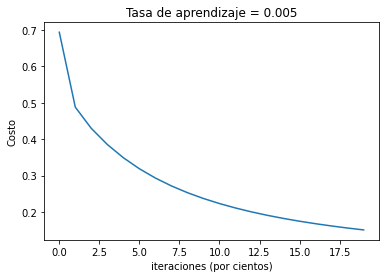

In [56]:
# Graficamos la curva de apredizaje
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title("Tasa de aprendizaje = " + str(d['learning_rate']))
plt.xlabel("iteraciones (por cientos)")
plt.ylabel("Costo")

#Conclusiones
La regresión logística por medio de un perceptrón es sumamente poderosa y rápida de calcular computacionalmente hablando, con uso de la vectorización y la eliminación de todo ciclo explicito es la clave del éxito computacional, fácil de entender, explicar y calcular.

Desventajas, pese a ser un modelo muy simple, cumple su trabajo, desgraciadamente al ser un modelo lineal con transformación sigmoide no es capaz de generar una clasificación correcta en clases mayormente entrelazadas, es por que este solamente es una introducción al gran tema de las redesneuronales y por ende al aprendizaje profundo.